In [1]:
import pandas as pd
import numpy as np
import json
import os
import sys
import stat
import matplotlib.pyplot as plt
from simpletransformers.classification import ClassificationModel
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import time
from tqdm import tqdm

C:\Users\nishu\anaconda3\envs\thesis\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\nishu\anaconda3\envs\thesis\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\nishu\anaconda3\envs\thesis\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
import warnings
import torch
from datetime import datetime


In [3]:
#pip install numpy==1.20
print(np.__version__)

1.22.4


In [4]:
#pip install transformers_interpret
#pip install shap
from transformers_interpret import SequenceClassificationExplainer
import transformers
from transformers import AutoModelForSequenceClassification,AutoTokenizer, TextClassificationPipeline
import shap
#import scipy as sp

#import nlp

In [20]:
data = pd.read_csv(r"C:\Padhai\MSCAIML\archive\cyberbullying_tweets.csv")

In [41]:
data_5 = data[data['cyberbullying_type'] == 'religion'].head(1)

In [42]:
data_4

tweet_text   cyberbullying_type
23916  @ikralla fyi, it looks like I was caught by it...  other_cyberbullying

In [43]:
data_test = pd.concat([data_test,data_5])

In [5]:
model_path = r"C:\Padhai\MSCAIML\archive\model_distilbert"
mapping = r"C:\Padhai\MSCAIML\archive\model_distilbert\model_mapping.json"

In [6]:
def json_read(path):
    flags = os.O_RDONLY
    modes = stat.S_IWUSR | stat.S_IRUSR
    with os.fdopen(os.open(path, flags, modes),"r") as fin:
        file = json.load(fin)
    
    return file


In [7]:
def load_model():
    
    model_path = r"C:\Padhai\MSCAIML\archive\model"
    mapping = r"C:\Padhai\MSCAIML\archive\model\model_mapping.json"
    
    json_file = json_read(mapping)
    
    tokenizer = AutoTokenizer.from_pretrained(model_path)
    model = AutoModelForSequenceClassification.from_pretrained(model_path)
    
    return model, json_file, tokenizer

# Transformers_interpret

In [8]:
def explain_transformer_interpret(model, json_file, tokenizer, sample_text):
    explainer_TI = SequenceClassificationExplainer(model = model, tokenizer = tokenizer)
    word_attributions = explainer_TI(text = sample_text)
    
    print("prediction using model : ", explainer_TI.predicted_class_name)
    print(word_attributions)
    
    explainer_TI.visualize("distilbert_viz.html")
    
    return explainer_TI

In [9]:
model, json_file, tokenizer = load_model()

In [10]:
sample_text = "rape is real..zvasiyana nema jokes about being drunk or being gay or being lesbian...rape is not ones choice or wish..thtz where the sensitivity is coming from"

In [11]:
explainer_TI = explain_transformer_interpret(model, json_file, tokenizer, sample_text)

prediction using model :  LABEL_1
[('[CLS]', 0.0), ('rape', 0.10182542830992726), ('is', 0.04737656521782342), ('real', 0.05958036094857975), ('.', 0.005575477529389557), ('.', 0.00868852370578723), ('z', 0.08874876859500781), ('##vas', 0.0010886262361919899), ('##iya', 0.005136124509366877), ('##na', 0.04102907567992784), ('ne', 0.03843318343972097), ('##ma', 0.009578928462316698), ('jokes', 0.10460727070374148), ('about', 0.0865720398707306), ('being', 0.07970483836252613), ('drunk', 0.06181062838527613), ('or', 0.052383448883336375), ('being', 0.17342385802205346), ('gay', 0.8291962507902741), ('or', 0.11046535543284573), ('being', 0.11115153029160671), ('lesbian', 0.38028003742797123), ('.', -0.011950625674162422), ('.', 0.04070268979114378), ('.', 0.046650085319848586), ('rape', 0.1946363645306301), ('is', -0.0034608450871928135), ('not', 0.022331841812233688), ('ones', -0.022382232151785496), ('choice', 0.002852865736674819), ('or', 0.04756768836511435), ('wish', 0.00639876066089

# SHAP

In [16]:
def shap_explain(text):
    #matplotlib.use('Agg')
    model, json_file, tokenizer = load_model()
    
    pred = TextClassificationPipeline(model=model, tokenizer=tokenizer, return_all_scores=True)
    
    prediction = pred([text])
    print(prediction[0])

    explainer = shap.Explainer(pred)
    shap_values = explainer([text])

    shap.plots.text(shap_values)

In [17]:
shap_explain(sample_text)

[{'label': 'LABEL_0', 'score': 0.1162743866443634}, {'label': 'LABEL_1', 'score': 0.6571833491325378}, {'label': 'LABEL_2', 'score': 0.05411932244896889}, {'label': 'LABEL_3', 'score': 0.0881168395280838}, {'label': 'LABEL_4', 'score': 0.0355989933013916}, {'label': 'LABEL_5', 'score': 0.04870717599987984}]


  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer: 2it [00:48, 48.02s/it]                                                                            


In [18]:
from sklearn.metrics import accuracy_score
accuracy_score(ground_truth,output_pred)

In [2]:
from alibi.explainers import IntegratedGradients

ModuleNotFoundError: No module named 'alibi'

In [3]:
pip install alibi

     -------------------------------------- 445.2/445.2 kB 1.3 MB/s eta 0:00:00
     ---------------------------------------- 11.8/11.8 MB 2.2 MB/s eta 0:00:00
  Using cached scikit_image-0.19.3-cp39-cp39-win_amd64.whl (12.1 MB)
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: 'c:\\users\\nishu\\anaconda3\\envs\\thesis\\lib\\site-packages\\numpy-1.23.1.dist-info\\METADATA'



# Shap Global


In [46]:
import os, sys, stat
import nltk
from nltk.corpus import stopwords
from nltk  import WordNetLemmatizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk import pos_tag, word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer

In [47]:
#clean the data

data_test['cleaned_tweet'] = data_test['tweet_text'].replace(r'\'|\"|\,|\.|\?|\+|\-|\/|\=|\(|\)|\n|"', '', regex=True)
data_test['cleaned_tweet'] = data_test['cleaned_tweet'].replace("  ", " ")

words_remove = ["ax","i","you","edu","s","t","m","subject","can","lines","re","what", "there","all","we",
                "one","the","a","an","of","or","in","for","by","on","but","is","in","a","not","with","as",
                "was","if","they","are","this","and","it","have","has","from","at","my","be","by","not","that","to",
                "from","com","org","like","likes","so","said","from","what","told","over","more","other",
                "have","last","with","this","that","such","when","been","says","will","also","where","why",
                "would","today", "in", "on", "you", "r", "d", "u", "hw","wat", "oly", "s", "b", "ht", 
                "rt", "p","the","th", "n", "was"]

def cleantext(df, words_to_remove = words_remove): 
    ### dont change the original tweet
    # remove emoticons form the tweets
    df['cleaned_tweet'] = df['cleaned_tweet'].replace(r'<ed>','', regex = True)
    df['cleaned_tweet'] = df['cleaned_tweet'].replace(r'\B<U+.*>|<U+.*>\B|<U+.*>','', regex = True)
    
    # convert tweets to lowercase
    df['cleaned_tweet'] = df['cleaned_tweet'].str.lower()
    
    #remove user mentions
    #df['cleaned_tweet'] = df['cleaned_tweet'].replace(r'^(@\w+)',"", regex=True)
    
    #remove 'user' in the beginning
    df['cleaned_tweet'] = df['cleaned_tweet'].replace(r'(@user+)',"", regex=True)
    
    #remove_symbols
    df['cleaned_tweet'] = df['cleaned_tweet'].replace(r'[^a-zA-Z0-9]', " ", regex=True)
    
    #remove punctuations 
    df['cleaned_tweet'] = df['cleaned_tweet'].replace(r'[[]!"#$%\'()\*+,-./:;<=>?^_`{|}]+',"", regex = True)

    #remove_URL(x):
    df['cleaned_tweet'] = df['cleaned_tweet'].replace(r'https.*$', "", regex = True)

    #remove 'amp' in the text
    df['cleaned_tweet'] = df['cleaned_tweet'].replace(r'amp',"", regex = True)
    
    #remove words of length 1 or 2 
    df['cleaned_tweet'] = df['cleaned_tweet'].replace(r'\b[a-zA-Z]{1,2}\b','', regex=True)

    #remove extra spaces in the tweet
    df['cleaned_tweet'] = df['cleaned_tweet'].replace(r'^\s+|\s+$'," ", regex=True)
     
    #remove_digits
    df['cleaned_tweet'] = df['cleaned_tweet'].replace(r'[0-9]', "", regex=True)
    
    #remove stopwords and words_to_remove
    stop_words = set(stopwords.words('english'))
    mystopwords = [stop_words, "via", words_to_remove]
    
    df['fully_cleaned_tweet'] = df['cleaned_tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in mystopwords]))
    
    return df

#get the processed tweets
data_test = cleantext(data_test)

In [48]:
data_test['fully_cleaned_tweet']

0        other words katandandre your food was crapilic...
7945     rape realzvasiyana nema jokes about being drun...
31739    here home neighbors pick family and mind you s...
39731    hey dumb fuck celebs stop doing something for ...
23916         ikralla fyi looks like was caught not botter
15918    sudeep did she invite him though right why are...
Name: fully_cleaned_tweet, dtype: object

In [49]:
test_tweet = list(data_test['fully_cleaned_tweet'])

In [50]:
shap_model, json_file_shap, tokenizer_shap = load_model()

In [51]:
pred = TextClassificationPipeline(model=shap_model, tokenizer=tokenizer_shap, return_all_scores=True)

`return_all_scores` is now deprecated, use `top_k=1` if you want similar functionnality


In [52]:
explainer_global = shap.Explainer(pred)

In [54]:
shap_values = explainer_global(test_tweet)

  0%|          | 0/240 [00:00<?, ?it/s]

Partition explainer:  17%|███████████▊                                                           | 1/6 [00:00<?, ?it/s]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  50%|███████████████████████████████▌                               | 3/6 [00:46<00:52, 17.64s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  67%|██████████████████████████████████████████                     | 4/6 [01:26<00:53, 26.58s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  83%|████████████████████████████████████████████████████▌          | 5/6 [01:55<00:27, 27.82s/it]

  0%|          | 0/182 [00:00<?, ?it/s]

Partition explainer: 100%|███████████████████████████████████████████████████████████████| 6/6 [02:02<00:00, 20.38s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer: 7it [02:39, 26.64s/it]                                                                            


In [62]:
shap_values

.values =
array([array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
                0.        ],
              [ 0.01495129, -0.00499243, -0.00343244,  0.00339428, -0.00479022,
               -0.0051305 ],
              [ 0.01714668, -0.00394329, -0.00570433,  0.0016457 , -0.00490732,
               -0.00423747],
              [ 0.01473681, -0.00236107, -0.00260599, -0.00259698, -0.00146049,
               -0.00571227],
              [ 0.01361191, -0.00582389, -0.00291654,  0.00491459, -0.00451636,
               -0.0052697 ],
              [ 0.02058527, -0.00466732, -0.00917285,  0.00923667, -0.00902756,
               -0.0069542 ],
              [ 0.02685275, -0.00487475, -0.00944198,  0.0079683 , -0.01050982,
               -0.0099945 ],
              [ 0.01344597, -0.00215914, -0.00721767,  0.00980198, -0.00795829,
               -0.00591285],
              [ 0.02204768, -0.00134522, -0.00725623, -0.00024925, -0.00619493,
               -0.00700205],
         

In [55]:
y_pred = pred(test_tweet)

In [58]:
y_pred

[[{'label': 'LABEL_0', 'score': 0.5154805779457092},
  {'label': 'LABEL_1', 'score': 0.10357881337404251},
  {'label': 'LABEL_2', 'score': 0.033618949353694916},
  {'label': 'LABEL_3', 'score': 0.2791730463504791},
  {'label': 'LABEL_4', 'score': 0.027524372562766075},
  {'label': 'LABEL_5', 'score': 0.0406242199242115}],
 [{'label': 'LABEL_0', 'score': 0.13453133404254913},
  {'label': 'LABEL_1', 'score': 0.6446002721786499},
  {'label': 'LABEL_2', 'score': 0.04555018991231918},
  {'label': 'LABEL_3', 'score': 0.10050231963396072},
  {'label': 'LABEL_4', 'score': 0.03283926472067833},
  {'label': 'LABEL_5', 'score': 0.041976578533649445}],
 [{'label': 'LABEL_0', 'score': 0.02479098178446293},
  {'label': 'LABEL_1', 'score': 0.028853554278612137},
  {'label': 'LABEL_2', 'score': 0.03816147521138191},
  {'label': 'LABEL_3', 'score': 0.021477682515978813},
  {'label': 'LABEL_4', 'score': 0.8606695532798767},
  {'label': 'LABEL_5', 'score': 0.026046721264719963}],
 [{'label': 'LABEL_0', '

In [59]:
def get_pred_label(y_pred):
    label_list = []
    for i in y_pred:
        dict_label_score = {}
        for item in i:
            dict_label_score[item['label']] = item['score']
        dict_label_score
        max_score = max(dict_label_score.items(),key =lambda x : x[1])
        label_list.append(max_score)
    return label_list

In [60]:
label_list = get_pred_label(y_pred)
label_list

[('LABEL_0', 0.5154805779457092),
 ('LABEL_1', 0.6446002721786499),
 ('LABEL_4', 0.8606695532798767),
 ('LABEL_5', 0.8316611051559448),
 ('LABEL_0', 0.47086235880851746),
 ('LABEL_2', 0.8201438784599304)]

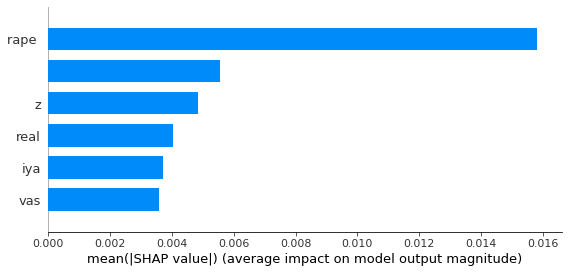

In [65]:
shap.summary_plot(shap_values[1],test_tweet,shap_values[1].data,plot_type = 'bar')

In [64]:
shap.plots.text(shap_values[1])